# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
import numpy as np

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [4]:
folder = 'image_predictions'
if not os.path.exists(folder):
    os.makedirs(folder)
    
file_path = os.path.join(folder, 'image_predictions.tsv')
response = requests.get(url)
df2 = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'hidden'
#consumer_secret = 'hidden'
#access_token = 'hidden'
#access_secret = 'hidden'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitter_arc.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
     #   count += 1
      #  print(str(count) + ": " + str(tweet_id))
       # try:
        #    tweet = api.get_status(tweet_id, tweet_mode='extended')
         #   print("Success")
          #  json.dump(tweet._json, outfile)
           # outfile.write('\n')
        #except tweepy.TweepError as e:
         #   print("Fail")
          #  fails_dict[tweet_id] = e
           # pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [6]:
df3 = pd.read_csv('tweet_json.txt')


## Assessing df1:

In [7]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


- Incorrect score for bella(45)
- 960/0 should be 13/10
- (doggo, floofer, pupper, puppo) data types
- Ratings out of higher than 10
- Outliers
- Remove retweets

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- timestamp and numerator datatype

In [9]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


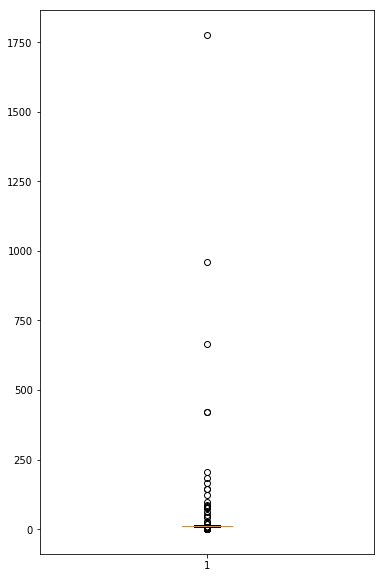

In [10]:
plt.figure(figsize=(6, 10))
plt.boxplot(df1.rating_numerator);

In [11]:
df1[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.Series.value_counts)

,doggo,floofer,pupper,puppo
None,2259.0,2346.0,2099.0,2326.0
doggo,97.0,NaN,NaN,NaN
floofer,NaN,10.0,NaN,NaN
pupper,NaN,NaN,257.0,NaN
puppo,NaN,NaN,NaN,30.0


In [12]:
df1.duplicated().sum()

0

## Assessing df2:

In [13]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


- Dog breeds have mix of capital and lowercase
- Non-dogs in rows

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
df2.duplicated().sum()

0

## Assessing df3:

In [17]:
df3

,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,39467,8853,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,Original tweet,https://t.co/AtUZn91f7f
5,891087950875897856,20562,3261,Original tweet,https://t.co/kQ04fDDRmh
6,890971913173991426,12041,2158,Original tweet,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7,890729181411237888,56848,16716,Original tweet,https://t.co/v0nONBcwxq
8,890609185150312448,28226,4429,Original tweet,https://t.co/9TwLuAGH0b
9,890240255349198849,32467,7711,Original tweet,https://t.co/t1bfwz5S2A


- Do not need url or retweet status

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
retweet_status    2354 non-null object
url               2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [19]:
df3.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [20]:
df3.duplicated().sum()

0

### Quality issues

#### df1

1. Incorrect score for 960/0 in df1


2. Rating for Bella (5/10) incorrect, need to allow for decimals in df1


3. (doggo, floofer, pupper, puppo) data types in df1


4. Ratings out of higher than 10 in df1


5. Outliers in df1


6. Non-dogs in df2


7. Retweets in df1


8. Timestamp datatype in df1

### Tidiness issues
1. Dog breeds have mix of capital and lowercase in df2


2. Do not need url or retweet status in df3

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### Issue #1:

#### Define:
- Incorrect score 960/0 at index 313 should be 13/10
- Replace values in rating_numerator and rating_denominator using .at and index 313

#### Code

In [22]:
df1_clean[df1_clean['rating_numerator'] == 960]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [23]:
df1_clean[df1_clean['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [24]:
df1_clean.at[313, 'rating_numerator'] = 13
df1_clean.at[313, 'rating_denominator'] = 10

**Test**

In [25]:
df1_clean[df1_clean['rating_numerator'] == 960]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [26]:
df1_clean[df1_clean['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [27]:
df1_clean.iloc[313]

tweet_id                                                     835246439529840640
in_reply_to_status_id                                               8.35246e+17
in_reply_to_user_id                                                 2.62596e+07
timestamp                                             2017-02-24 21:54:03 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          @jonnysun @Lin_Manuel ok jomny I know you're e...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

### Issue 2:

**Define:**

- Rating for Bella at index 45 incorrectly recorded as 5/10
- Actual rating is 13.5/10
- Datatype of numerator does not allow for decimals
- Change datatype of rating_numerator using astype(float)
- Update score for Bella at index 45 using .at

**Code**

In [28]:
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].astype(float)

In [29]:
df1_clean[df1_clean['name'] == 'Bella']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5.0,10,Bella,None,None,None,None
60,880465832366813184,NaN,NaN,2017-06-29 16:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880465832...,12.0,10,Bella,None,None,None,None
1089,737800304142471168,NaN,NaN,2016-06-01 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's ubering home after a few ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737800304...,10.0,10,Bella,None,None,None,None
1354,703631701117943808,NaN,NaN,2016-02-27 17:24:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. Based on this picture she's at ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703631701...,11.0,10,Bella,None,None,None,None
1768,678389028614488064,NaN,NaN,2015-12-20 01:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She just learned that her final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678389028...,11.0,10,Bella,None,None,pupper,None
1964,673350198937153538,NaN,NaN,2015-12-06 03:56:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's a Genghis Flopped Canuck....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673350198...,9.0,10,Bella,None,None,None,None


In [30]:
df1_clean.at[45, 'rating_numerator'] = 13.5

#### Test

In [31]:
df1_clean.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator              float64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [32]:
df1_clean.iloc[45]

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-08 00:28:19 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bella. She hopes her smile made you sm...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                           13.5
rating_denominator                                                           10
name                                    

### Issue #3:

#### Define

- Change doggo, floofer, pupper, puppo datatypes from object to bool to int
- Use loop to convert all values of "none" to '' to allow int type to reflect "False" as "0"
- Change datatype to int using astype


#### Code

In [33]:
for i, v in enumerate(df1_clean['doggo']):
    if v == 'None':
        df1_clean.at[i, 'doggo'] = ''

In [34]:
for i, v in enumerate(df1_clean['floofer']):
    if v == 'None':
        df1_clean.at[i, 'floofer'] = ''

In [35]:
for i, v in enumerate(df1_clean['pupper']):
    if v == 'None':
        df1_clean.at[i, 'pupper'] = ''

In [36]:
for i, v in enumerate(df1_clean['puppo']):
    if v == 'None':
        df1_clean.at[i, 'puppo'] = ''

In [37]:
df1_clean['doggo'] = df1_clean['doggo'].astype(bool)
df1_clean['floofer'] = df1_clean['floofer'].astype(bool)
df1_clean['pupper'] = df1_clean['pupper'].astype(bool)
df1_clean['puppo'] = df1_clean['puppo'].astype(bool)

In [38]:
df1_clean['doggo'] = df1_clean['doggo'].astype(int)
df1_clean['floofer'] = df1_clean['floofer'].astype(int)
df1_clean['pupper'] = df1_clean['pupper'].astype(int)
df1_clean['puppo'] = df1_clean['puppo'].astype(int)

#### Test

In [39]:
df1_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,0,0,0,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,0,0,0,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,0,0,0,0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,0,0,0,0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,0,0,0,0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,0,0,0,0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,0,0,0,0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,0,0,0,0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,0,0,0,0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,1,0,0,0


In [40]:
df1_clean.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator              float64
rating_denominator              int64
name                           object
doggo                           int64
floofer                         int64
pupper                          int64
puppo                           int64
dtype: object

### Issue 4:

**Define:**

- Use rows that only have rating_denominator values of 10
- Replace df1_clean with those rows that only have rating_denominator value of 10

**Code**

In [41]:
df1_clean[df1_clean['rating_denominator'] != 10]['rating_denominator'].count()

22

In [42]:
df1_clean[df1_clean['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11.0,15,None,0,0,0,0
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84.0,70,None,0,0,0,0
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7,Sam,0,0,0,0
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9.0,11,None,0,0,0,0
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165.0,150,None,0,0,0,0
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9.0,11,None,0,0,0,0
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204.0,170,this,0,0,0,0
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4.0,20,None,0,0,0,0
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50.0,50,Bluebert,0,0,0,0
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99.0,90,None,0,0,0,0


In [43]:
df1_clean = df1_clean[df1_clean['rating_denominator'] == 10]

**Test**

In [44]:
df1_clean[df1_clean['rating_denominator'] != 10]['rating_denominator'].count()

0

In [45]:
df1_clean[df1_clean['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue 5:

**Define:**

- Remove outliers in rating_numerator above 70
- Use boolean indexing

**Code**

In [46]:
df1_clean[df1_clean['rating_numerator'] >= 70]['rating_numerator'].count()

7

In [47]:
df1_clean = df1_clean[df1_clean['rating_numerator'] <= 70]

**Test**

In [48]:
df1_clean[df1_clean['rating_numerator'] >= 70]['rating_numerator'].count()

0

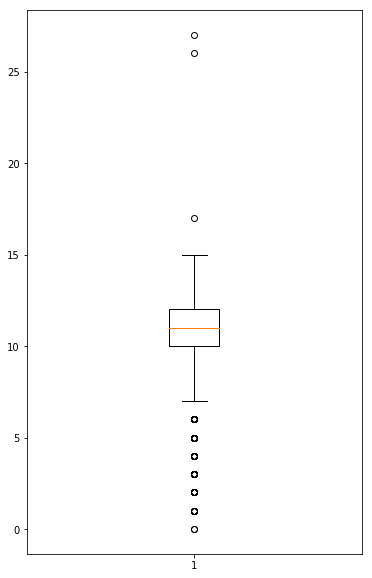

In [49]:
plt.figure(figsize=(6, 10))
plt.boxplot(df1_clean.rating_numerator);

In [50]:
df1_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
count,2.327000e+03,7.100000e+01,7.100000e+01,1.790000e+02,1.790000e+02,2327.000000,2327.0,2327.000000,2327.000000,2327.000000,2327.000000
mean,7.428004e+17,7.424594e+17,2.212751e+16,7.721349e+17,1.255572e+16,10.725183,10.0,0.041685,0.004297,0.110443,0.012892
std,6.865145e+16,7.467891e+16,1.312247e+17,6.266404e+16,9.652124e+16,2.225130,0.0,0.199910,0.065427,0.313508,0.112834
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,10.0,0.000000,0.000000,0.000000,0.000000
25%,6.783607e+17,6.754232e+17,8.330126e+08,7.157203e+17,4.196984e+09,10.000000,10.0,0.000000,0.000000,0.000000,0.000000
50%,7.197045e+17,7.032559e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.0,0.000000,0.000000,0.000000,0.000000
75%,7.993658e+17,8.171399e+17,4.196984e+09,8.205322e+17,4.196984e+09,12.000000,10.0,0.000000,0.000000,0.000000,0.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,27.000000,10.0,1.000000,1.000000,1.000000,1.000000


### Issue 6:

**Define:**

- df2 has rows with images that are not dogs
- Filter out non-dog images using boolean indexing

**Code**

In [51]:
df2_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [52]:
df2_clean = df2_clean[(df2_clean['p1_dog'] == True) & (df2_clean['p2_dog'] == True) & (df2_clean['p3_dog'] == True)]

**Test**

In [53]:
df2_clean[df2_clean['p1_dog'] != True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [54]:
df2_clean[df2_clean['p2_dog'] != True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [55]:
df2_clean[df2_clean['p3_dog'] != True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue 7:

**Define:**

- Remove retweets from df1 using .isnull

**Code**

In [56]:
df1_clean = df1_clean[df1_clean['retweeted_status_id'].isnull()]
df1_clean = df1_clean[df1_clean['in_reply_to_status_id'].isnull()]

In [57]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2077 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2077 non-null object
source                        2077 non-null object
text                          2077 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2074 non-null object
rating_numerator              2077 non-null float64
rating_denominator            2077 non-null int64
name                          2077 non-null object
doggo                         2077 non-null int64
floofer                       2077 non-null int64
pupper                        2077 non-null int64
puppo                         2077 non-null int64
dtypes: float64(5), int64(6), object(6)
me

**Test**

### Issue 8:

**Define:**

- Change timestamp to datetime datatype using .to_datetime

**Code**

In [58]:
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

**Test**

In [59]:
df1_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                     float64
rating_denominator                     int64
name                                  object
doggo                                  int64
floofer                                int64
pupper                                 int64
puppo                                  int64
dtype: object

### Issue 9:

**Define:**

- Change all dog names to lower case using str.lower

**Code**

In [60]:
df2_clean['p1'] = df2_clean['p1'].str.lower()
df2_clean['p2'] = df2_clean['p2'].str.lower()
df2_clean['p3'] = df2_clean['p3'].str.lower()

**Test**

In [61]:
df2_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,tibetan_mastiff,0.093718,True,labrador_retriever,0.072427,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,gordon_setter,0.503672,True,yorkshire_terrier,0.174201,True,pekinese,0.109454,True
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,walker_hound,0.260857,True,english_foxhound,0.175382,True,ibizan_hound,0.097471,True


### Issue 10:


**Define:**

- Remove 'url' and 'retweet status' in df3
- Remove 'source', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' in df1
- Merge tables into one

In [62]:
df3_clean.head()

,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,39467,8853,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,Original tweet,https://t.co/AtUZn91f7f


In [63]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2077 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2077 non-null datetime64[ns]
source                        2077 non-null object
text                          2077 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2074 non-null object
rating_numerator              2077 non-null float64
rating_denominator            2077 non-null int64
name                          2077 non-null object
doggo                         2077 non-null int64
floofer                       2077 non-null int64
pupper                        2077 non-null int64
puppo                         2077 non-null int64
dtypes: datetime64[ns](1), float64

**Code**

In [64]:
df3_clean = df3_clean.drop(['url', 'retweet_status'], axis=1)


In [65]:
df1_clean = df1_clean.drop(['source', 'expanded_urls', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

**Test**

In [66]:
df3_clean.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [67]:
df1_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,0,0,0,0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,0,0,0,0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,0,0,0,0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,0,0,0,0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,0,0,0,0


**Code**

In [68]:
df4_clean = pd.merge(df1_clean, df3_clean, on='tweet_id')

In [69]:
master_df = pd.merge(df4_clean, df2_clean, on='tweet_id')

In [70]:
master_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,0,0,0,0,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,0,0,0,0,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,0,0,0,0,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
3,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13.0,10,None,0,0,0,0,...,2,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
4,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,0,0,0,0,...,1,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True


In [71]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 0 to 1180
Data columns (total 23 columns):
tweet_id              1181 non-null int64
timestamp             1181 non-null datetime64[ns]
text                  1181 non-null object
rating_numerator      1181 non-null float64
rating_denominator    1181 non-null int64
name                  1181 non-null object
doggo                 1181 non-null int64
floofer               1181 non-null int64
pupper                1181 non-null int64
puppo                 1181 non-null int64
favorite_count        1181 non-null int64
retweet_count         1181 non-null int64
jpg_url               1181 non-null object
img_num               1181 non-null int64
p1                    1181 non-null object
p1_conf               1181 non-null float64
p1_dog                1181 non-null bool
p2                    1181 non-null object
p2_conf               1181 non-null float64
p2_dog                1181 non-null bool
p3                    1181 non-null

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [72]:
master_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

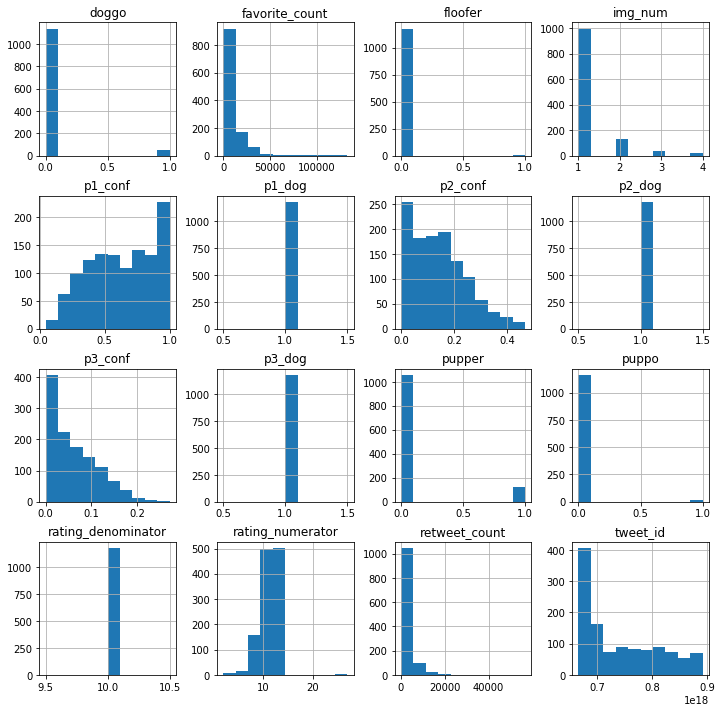

In [73]:
master_df.hist(figsize=(12, 12));

## Average ratings of doggo, floofer, pupper, and puppo

In [74]:
doggo_count = master_df[master_df['doggo'] == True]['doggo'].count()
floofer_count = master_df[master_df['floofer'] == True]['floofer'].count()
pupper_count = master_df[master_df['pupper'] == True]['pupper'].count()
puppo_count = master_df[master_df['puppo'] == True]['puppo'].count()

In [75]:
doggo_prop = doggo_count / len(master_df)
floofer_prop = floofer_count / len(master_df)
pupper_prop = pupper_count / len(master_df)
puppo_prop = puppo_count / len(master_df)

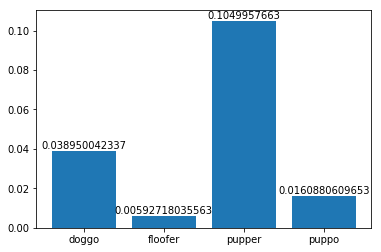

In [76]:
stages = ['doggo', 'floofer', 'pupper', 'puppo']
proportions = [doggo_prop, floofer_prop, pupper_prop, puppo_prop]
plt.bar(stages, proportions);
for i, count in enumerate(proportions):
    plt.text(i, count, str(count), ha='center', va='bottom')

In [77]:
doggo_avg_rating = master_df[master_df['doggo'] == True]['rating_numerator'].mean()
floofer_avg_rating = master_df[master_df['floofer'] == True]['rating_numerator'].mean()
pupper_avg_rating = master_df[master_df['pupper'] == True]['rating_numerator'].mean()
puppo_avg_rating = master_df[master_df['puppo'] == True]['rating_numerator'].mean()

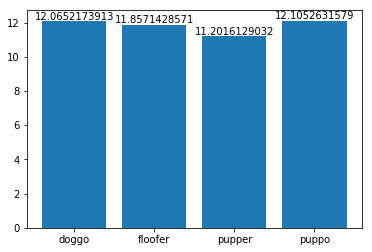

In [78]:
stages = ['doggo', 'floofer', 'pupper', 'puppo']
avg_rating = [doggo_avg_rating, floofer_avg_rating, pupper_avg_rating, puppo_avg_rating]
plt.bar(stages, avg_rating);
for i, count in enumerate(avg_rating):
    plt.text(i, count, str(count), ha='center', va='bottom')

## Correlation between rating and retweets

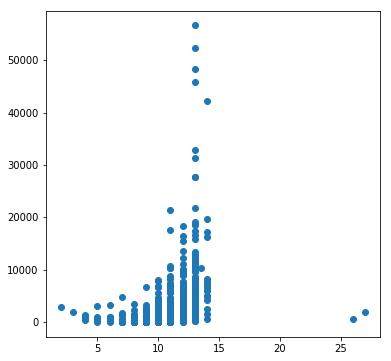

In [79]:
plt.figure(figsize=(6,6))
plt.scatter(master_df['rating_numerator'], master_df['retweet_count']);

## Comparison of image analysis confidence

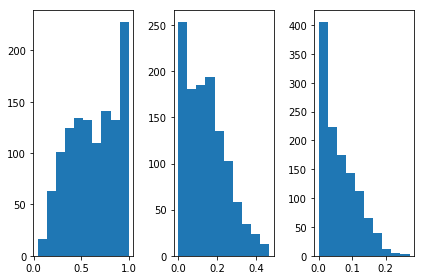

In [80]:
plt.subplot(1, 3, 1)
plt.hist(master_df['p1_conf']);

plt.subplot(1, 3, 2)
plt.hist(master_df['p2_conf']);

plt.subplot(1, 3, 3)
plt.hist(master_df['p3_conf']);

plt.tight_layout()

In [81]:
p1 = master_df['p1_conf'].mean()
p1

0.62776593056731589

In [82]:
p2 = master_df['p2_conf'].mean()
p2

0.14371070421972904

In [83]:
p3 = master_df['p3_conf'].mean()
p3

0.061212579924809475

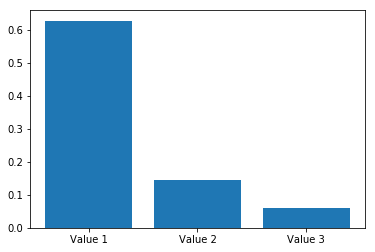

In [84]:
values= [p1, p2, p3]
plt.bar(['Value 1', 'Value 2', 'Value 3'], values);

### Insights:
1. Dogs classified as puppos received the highest average rating of 12.1/10. Doggos had a average rating of 12.07/10, floofers had an average rating of 11.86/10, and puppers had an average rating of 11.2/10

2. There could be a positive correlation between rating and number of retweets

3. On average the tweet image predictions were on average 62.8% confident on the first identification, 14.4% on the second identification, and 6.1% on the third identification

### Visualizations

#### 1:

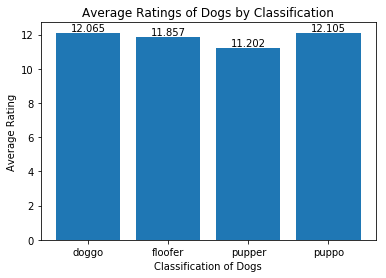

In [85]:
stages = ['doggo', 'floofer', 'pupper', 'puppo']
avg_rating = [doggo_avg_rating, floofer_avg_rating, pupper_avg_rating, puppo_avg_rating]
plt.bar(stages, avg_rating);
for i, count in enumerate(avg_rating):
    plt.text(i, count, f'{count:.3f}', ha='center', va='bottom')
plt.ylabel('Average Rating')
plt.xlabel('Classification of Dogs')
plt.title('Average Ratings of Dogs by Classification');

#### 2:

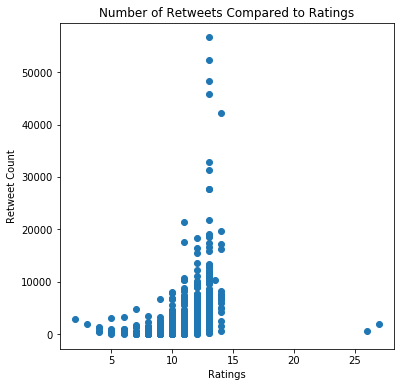

In [86]:
plt.figure(figsize=(6,6))
plt.scatter(master_df['rating_numerator'], master_df['retweet_count']);
plt.ylabel('Retweet Count')
plt.xlabel('Ratings')
plt.title('Number of Retweets Compared to Ratings');

#### 3:

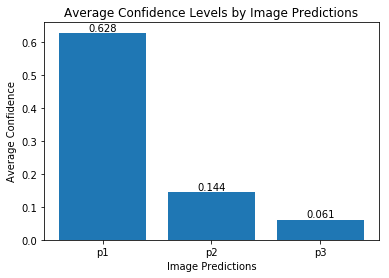

In [87]:
values= [p1, p2, p3]
plt.bar(['p1', 'p2', 'p3'], values);
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')
plt.ylabel('Average Confidence')
plt.xlabel('Image Predictions')
plt.title('Average Confidence Levels by Image Predictions');
